$$Conceito:$$
    
-Modelos Supervisionados, que fazem inferencia ou predição para outras observações não presentes na amostra

-Distribuição Normal dos dados

$$Criterios:$$

-Modelo dos minimos quadrados(OLS) = Somatoria dos erros² (Elimina os negativos) seja a minima possivel

-Reta de regressão precisa ter a somatoria dos erros = 0 

-Variáveis somente Quantitativas

$$Coeficientes:$$

-**Intercepto (𝛼)** = Constante do modelo 

-**Beta (𝛽)** = Coeficiente angular do modelo

-**u**= Termo de erro



# Objetivo: Criar um modelo de regressão linear Multiplo

In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import statsmodels.api as sm

# Banco de dados 

In [2]:
#Base de dados
dados = pd.read_csv('paises.csv',encoding='latin-1',sep=',')
dados

,pais,cpi,idade,horas
0,Argentina,3.9,72,35.000000
1,Australia,8.7,64,32.000000
2,Austria,7.9,72,32.000000
3,Belgium,7.1,67,30.100000
4,Brazil,4.0,59,35.000000
5,Canada,8.9,61,33.400002
6,Chile,6.2,70,34.000000
7,China,2.5,49,34.000000
8,Colombia,4.0,79,33.000000
9,Cyprus,6.3,58,32.000000


**Tabela com 49 observações e 4 variáveis**

# Dicionário de Dados das variáveis

**$$Variáveis:$$**

**-pais:** Nome do País

**-cpi:** Indice de percepção de corrupção dos habitante do País, Nota varia de 0 a 10, quanto maior a nota, melhor a percepção do mecanismo de corrupção
    
**-idade:** Idade media dos bilhonarios do país
    
**-horas:** Quantidade de horas trabalhadas em media por semana pela população economicamente ativa no País

In [3]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   idade   50 non-null     int64  
 3   horas   50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


**Temos 3 variáveis quantitativa e 1 qualitativa**

In [4]:
#Descrição dos dados
dados.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.799999
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.099998


# Gráfico de Dispersão 

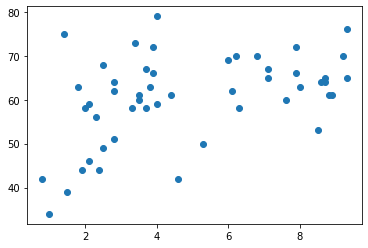

In [5]:
# cpi X idade
plt.scatter(x=dados['cpi'] ,y =dados['idade']);

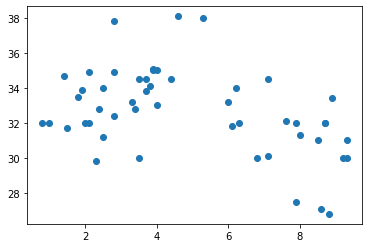

In [6]:
# cpi X horas
plt.scatter(x=dados['cpi'] ,y =dados['horas']);

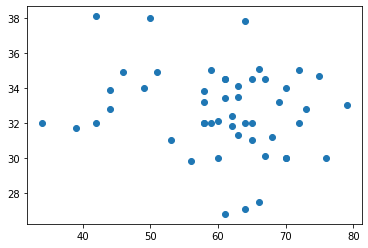

In [7]:
# idade X horas
plt.scatter(x=dados['idade'] ,y =dados['horas']);

In [8]:
#Correlação de Pearson
dados.corr()

,cpi,idade,horas
cpi,1.000000,0.442838,-0.435724
idade,0.442838,1.000000,-0.191748
horas,-0.435724,-0.191748,1.000000


**Muita das vezes graficamente vai ser dificil saber se há uma correlação forte ou fraca entre 2 variáveis, uma maneira mais facil é criar uma correlação de Pearson**

**Note que há uma correlaçao fraca entre as variáveis 'horas', 'idade' e uma correlação media entre as variáveis 'idade','cpi' e 'cpi','horas'**

In [9]:
# Modelagem de uma regressão linear multipla

In [10]:
#Separar as variáveis X e Y
x=dados[['idade','horas']] 
y =dados['cpi']

In [11]:
#MODELAGEM DE UMA REGRESSÃO LINEAR Multipla
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           0.000101
Time:                        11:41:42   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared(R²)** = Indica em forma de porcentagem o quanto da variável Dependente(y) é explicada atráves da variável Explicativas(X)**

**F-statistic:** = Permite analisar se pelo menos um dos b’s é estatisticamente significante para a explicação do comportamento de Y

**Df Residuals:** = São os graus de liberdade, o calculo se dá através do numero de observações do dataframe menos o numero de parametros do algoritimo, o numero também representa o maximo de variáveis explicativas eu posso ter em meu modelo**

**Teste t:** = Verifica de forma individual se a variável é estatisticamente significante para a explicação do comportamento de Y

## Calculo do R²

In [12]:
#Media dos dados da variavel target 
media_dados = np.mean(y)
media_dados

4.894000002145767

In [13]:
# Previsao do modelo
fitted = resultado.fittedvalues
dados['fitted'] = fitted
fitted

0     5.103394
1     5.509820
2     6.307404
3     6.571454
4     3.807319
5     4.648853
6     5.305335
7     3.211674
8     6.603954
9     4.911631
10    0.868307
11    7.508870
12    5.011329
13    6.910682
14    7.515231
15    5.913701
16    4.814477
17    5.595176
18    4.808116
19    3.316461
20    5.691058
21    4.465072
22    4.911631
23    2.753317
24    5.149888
25    3.137768
26    6.086033
27    7.297677
28    6.010855
29    7.476370
30    4.430027
31    5.522889
32    1.706025
33    5.526706
34    4.805572
35    2.551376
36    4.189225
37    4.207383
38    3.182067
39    5.390691
40    6.910682
41    5.609518
42    2.518876
43    4.567315
44    6.229681
45    4.207383
46    3.194788
47    5.070894
48    4.606176
49    3.049867
dtype: float64

In [14]:
#Erro do modelo
dados['Erro'] = resultado.resid
print(resultado.resid)
print(f'\nSoma dos Erros: {round(sum(resultado.resid),2)}')

0    -1.203394
1     3.190180
2     1.592596
3     0.528546
4     0.192681
5     4.251146
6     0.894665
7    -0.711674
8    -2.603954
9     1.388369
10    3.731692
11    1.791130
12   -2.911329
13   -0.110682
14    0.384769
15   -2.413701
16    3.685523
17   -3.295176
18   -3.008116
19   -2.516461
20    2.308942
21   -0.565072
22   -2.911631
23   -0.853317
24   -2.349888
25   -1.637768
26   -2.686033
27    1.502323
28    3.289146
29    1.123631
30   -1.130027
31   -4.122889
32    3.593975
33    0.473294
34   -1.105572
35   -0.451376
36   -0.489225
37   -0.707383
38   -0.382067
39    0.709309
40    2.289318
41    3.090482
42   -1.518876
43   -0.767315
44   -3.729681
45    0.192617
46   -0.794788
47    2.529106
48    2.493824
49   -0.249867
dtype: float64

Soma dos Erros: 0.0


**Diferença entre o valor previsto e o valor real, soma dos valores precisa ser 0**

In [15]:
#Soma dos erro do modelo²(SQE)
dados['SQE'] = resultado.resid**2
SQE = sum(resultado.resid**2)
SQE

237.7730069054656

**Soma dos erros do modelo ao quadrado para eliminar os valores negativos**

In [16]:
# (Modelo previsto - modelo medio)² 
SQM = (media_dados - fitted)**2
dados['SQM'] = SQM
SQM = sum(SQM)

#Ou

resultado.mse_model

56.94759745986242

**Diferença entre a media dos dados menos a previsão do modelo ao quadrado**

In [17]:
#R²
r2 = SQM/(SQM+SQE)
r2

0.3238711783681276

**Note que as variáveis X explicam 32% da variável Y, portanto 68% restante são explicadas por variáveis não presentes na amostra**

## Calculo do F de Fisher-Snedecor

In [18]:
#Calculo do F de Fisher-Snedecor
K = len(resultado.cov_params()) #Numero de parametros do modelo
n = len(dados) #Numero de observações da base de dados

F = (SQM/(K-1))/(SQE/(n-K))
F


11.256690216638775

In [19]:
#P_Valor do calculo do F de Fisher-Snedecor
resultado.f_pvalue

0.0001013192708941236

**Como o P_valor do calculo da estatistica F é menor que 0.05, concluimos que pelo menos 1 coeficiente Beta é estatisticamente significante, diferente de 0, portanto há modelo**

## Teste t

In [20]:
resultado.pvalues

const    0.024868
idade    0.003731
horas    0.004550
dtype: float64

**As 2 variáveis explicativas se mostram estatisticamente significantes para a construção do modelo**  

In [21]:
#Banco de dados Completo 
dados

,pais,cpi,idade,horas,fitted,Erro,SQE,SQM
0,Argentina,3.9,72,35.000000,5.103394,-1.203394,1.448157,0.043846
1,Australia,8.7,64,32.000000,5.509820,3.190180,10.177250,0.379234
2,Austria,7.9,72,32.000000,6.307404,1.592596,2.536361,1.997712
3,Belgium,7.1,67,30.100000,6.571454,0.528546,0.279361,2.813851
4,Brazil,4.0,59,35.000000,3.807319,0.192681,0.037126,1.180876
5,Canada,8.9,61,33.400002,4.648853,4.251146,18.072246,0.060097
6,Chile,6.2,70,34.000000,5.305335,0.894665,0.800426,0.169196
7,China,2.5,49,34.000000,3.211674,-0.711674,0.506480,2.830219
8,Colombia,4.0,79,33.000000,6.603954,-2.603954,6.780579,2.923944
9,Cyprus,6.3,58,32.000000,4.911631,1.388369,1.927569,0.000311
